In [11]:
import sklearn
import pandas as pd
import numpy as np

In [12]:
y = pd.DataFrame([1,4,10,9,6,3,1,5])
x = pd.DataFrame([54,35,94,68,22,78,99,45])

In [14]:
y

,0
0,1
1,4
2,10
3,9
4,6
5,3
6,1
7,5


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [13]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lr.coef_

array([[0.00426226]])

In [19]:
lr.intercept_

array([4.61127285])

In [17]:
lr.score(x,y)

0.0012361220486427626

# Titanic Dataset Application

In [22]:
data = pd.read_csv("train.csv")

In [27]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [32]:
data.shape

(891, 12)

In [36]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
data_final = data.drop(["Age", "Cabin", "Embarked", "Sex", "Name", "Ticket"], axis=1)

In [66]:
x = data_final.drop(["Survived"], axis=1)

In [67]:
y = data_final[["Survived"]]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

In [71]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [72]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

C:\Users\sridhar.v\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sridhar.v\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\sridhar.v\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [73]:
p1 = lr.predict(X_test)
p2 = knn.predict(X_test)
p3 = nb.predict(X_test)
p4 = dt.predict(X_test)
p5 = rf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [76]:
print(accuracy_score(p1,y_test))
print(accuracy_score(p2,y_test))
print(accuracy_score(p3,y_test))
print(accuracy_score(p4,y_test))
print(accuracy_score(p5,y_test))

0.6444444444444445
0.5888888888888889
0.6333333333333333
0.6333333333333333
0.6444444444444445


In [79]:
print(f1_score(p1,y_test))
print(f1_score(p2,y_test))
print(f1_score(p3,y_test))
print(f1_score(p4,y_test))
print(f1_score(p5,y_test))

0.4838709677419355
0.39344262295081966
0.4590163934426229
0.56
0.5151515151515151


In [80]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(p4,y_test)

array([[36, 20],
       [13, 21]])

In [89]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

AUC: 0.623


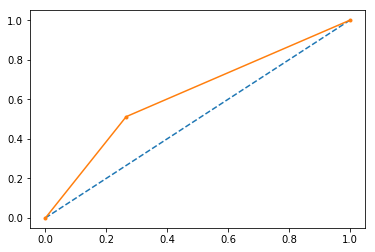

In [90]:
probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()